In [1]:
import os
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [2]:
with open(os.path.join(os.getcwd(), '..', 'file_pkl', 'base_census.pkl'), 'rb') as f:
    x_census_training, x_census_test, y_census_training, y_census_test = pickle.load(f)

In [3]:
x_census_training.shape, y_census_training.shape

((27676, 108), (27676,))

In [4]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [5]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [6]:
knn_classifier.fit(x_census_training, y_census_training)

KNeighborsClassifier()

In [7]:
predict = knn_classifier.predict(x_census_test)
predict

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [8]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [9]:
print(accuracy_score(y_census_test, predict))

0.8223132036847492


In [10]:
print(classification_report(y_census_test, predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885



0.8223132036847492

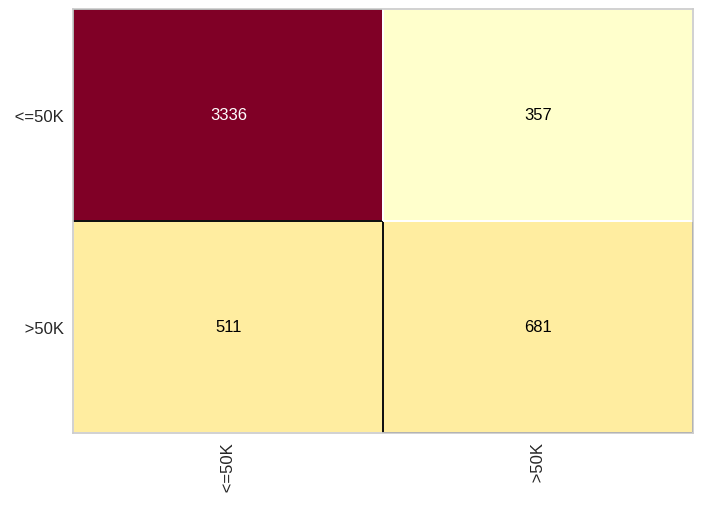

In [11]:
cm = ConfusionMatrix(knn_classifier)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)